In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [87]:
class GP(object):
    
    @classmethod
    def kernel_bell_shape(cls, x, y, beta=1, delta=1):
        return np.exp(-1/2.0 * np.power(x - y, 2) / delta)
    
    @classmethod
    def kernel_laplacian(cls, x, y):
        return np.exp(-1/2.0 * np.abs(x - y))
    
    @classmethod
    def generate_kernel(cls, kernel, beta=1, delta=1):
        def wrapper(*args, **kwargs):
            kwargs.update({"beta": beta, "delta": delta})
            return kernel(*args, **kwargs)
        return wrapper
        
    def __init__(self, x, y, cov_f=None):
        super().__init__()
        self.x = x
        self.y = y
        self.N = len(self.x)

        self.sigma = []
        self.mean = []
        self.cov_f = cov_f if cov_f else self.kernel_bell_shape
        self.setup_sigma()
        
    def setup_sigma(self):
        self.sigma = np.ones((self.N, self.N))
        for i in range(self.N):
            for j in range(i+1, self.N):
                cov = self.cov_f(self.x[i], self.x[j])
                self.sigma[i][j] = cov
                self.sigma[j][i] = cov

    def predict(self, x):
        cov = self.cov_f(x, x)
        sigma_1_2 = np.zeros((self.N, 1))
        for i in range(self.N):
            sigma_1_2[i] = self.cov_f(self.x[i], x)

        # SIGMA_1_2 * SIGMA_1_1.I * (Y.T -M)
        # M IS ZERO
        m_expt = (sigma_1_2.T * np.mat(self.sigma).I) * np.mat(self.y).T
        sigma_expt = cov - (sigma_1_2.T * np.mat(self.sigma).I) * sigma_1_2
        return m_expt, sigma_expt


## Setting up a gaussian processor

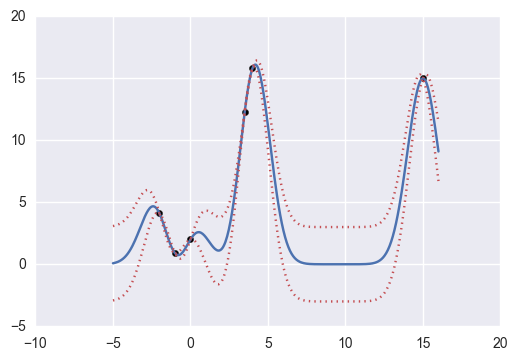

In [88]:
x = np.array([-2, -1, 0, 3.5, 4, 15]);
y = np.array([4.1, 0.9, 2, 12.3, 15.8, 15])
gaus = GP(x, y)

x_guess = np.linspace(-5, 16, 400)
y_pred = np.vectorize(gaus.predict)(x_guess)

plt.scatter(x, y, c="black")
plt.plot(x_guess, y_pred[0], c="b")
plt.plot(x_guess, y_pred[0] - np.sqrt(y_pred[1]) * 3, "r:")
plt.plot(x_guess, y_pred[0] + np.sqrt(y_pred[1]) * 3, "r:")

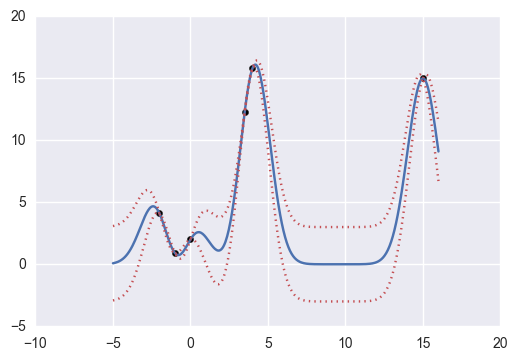

/Users/muatik/projects/dm/venv/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt
/Users/muatik/projects/dm/venv/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt


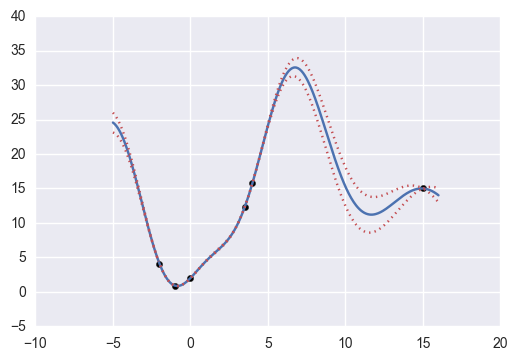

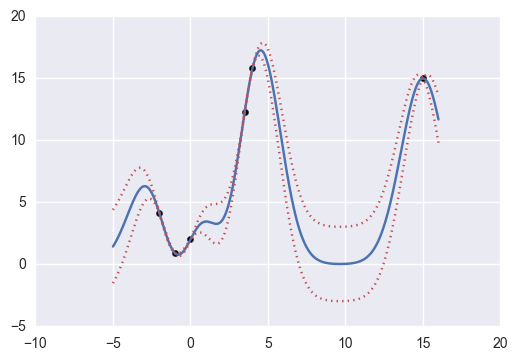

In [92]:
def create_case(kernel):
    x = np.array([-2, -1, 0, 3.5, 4, 15]);
    y = np.array([4.1, 0.9, 2, 12.3, 15.8, 15])
    gaus = GP(x, y, kernel)

    x_guess = np.linspace(-5, 16, 400)
    y_pred = np.vectorize(gaus.predict)(x_guess)

    plt.scatter(x, y, c="black")
    plt.plot(x_guess, y_pred[0], c="b")
    plt.plot(x_guess, y_pred[0] - np.sqrt(y_pred[1]) * 3, "r:")
    plt.plot(x_guess, y_pred[0] + np.sqrt(y_pred[1]) * 3, "r:")
    plt.show()

create_case(
    GP.generate_kernel(GP.kernel_bell_shape, beta=1, delta=1))
create_case(
    GP.generate_kernel(GP.kernel_bell_shape, beta=1, delta=8))
create_case(
    GP.generate_kernel(GP.kernel_bell_shape, beta=1, delta=2))


## Prediction

In [24]:
x_guess = np.linspace(-5, 16, 400)
y_pred = np.vectorize(gaus.predict)(x_guess)

## Plotting

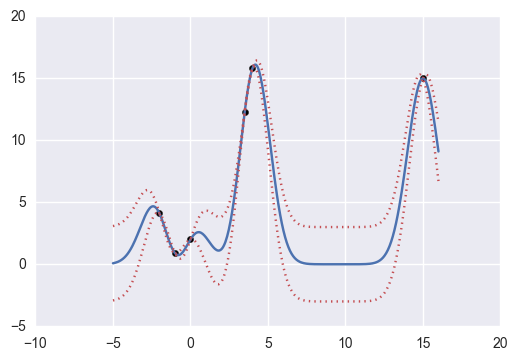

In [25]:
plt.scatter(x, y, c="black")
plt.plot(x_guess, y_pred[0], c="b")
plt.plot(x_guess, y_pred[0] - np.sqrt(y_pred[1]) * 3, "r:")
plt.plot(x_guess, y_pred[0] + np.sqrt(y_pred[1]) * 3, "r:")